# Bar plot for results all models

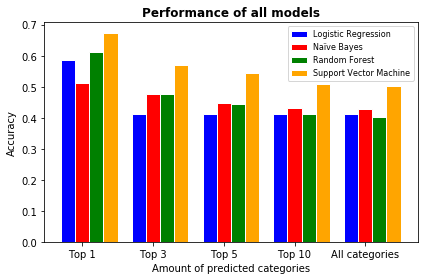

In [2]:
# Source:
# https://python-graph-gallery.com/11-grouped-barplot/

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
 
# set height of bar
LR = [0.5870, 0.4120, 0.4116, 0.4109, 0.4108]
NB = [0.5112, 0.4757, 0.4485, 0.4308, 0.4280]
RF = [0.6133, 0.4774, 0.4459, 0.4121, 0.4028]
SVM = [0.6737, 0.5690, 0.5440, 0.5073, 0.5030]
 
# Set position of bar on X axis
r1 = np.arange(len(LR))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, LR, color='blue', width=barWidth, edgecolor='white', label='Logistic Regression')
plt.bar(r2, NB, color='red', width=barWidth, edgecolor='white', label='Naïve Bayes')
plt.bar(r3, RF, color='green', width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r4, SVM, color='orange', width=barWidth, edgecolor='white', label='Support Vector Machine')
 
# Add xticks on the middle of the group bars
plt.xlabel('Amount of predicted categories')
plt.xticks([r + barWidth for r in range(len(LR))], ['Top 1', 'Top 3', 'Top 5', 'Top 10', 'All categories'])
 
# Create legend & Show graphic
plt.ylabel('Accuracy')
plt.title('Performance of all models', fontweight = 'bold')
plt.legend(prop={'size':8})
plt.tight_layout()
plt.show()


# Load prediction lists of Support Vector Machine

In [1]:
import numpy
import pandas as pd
import pickle
  
phone_use_category = pd.read_csv('final_dataframe.csv', index_col=0)

# Change NaN rows to Low Frequency App
phone_use_category = phone_use_category.fillna('Low Frequency App')


with open('y_pred_SVMall', 'rb') as a1:
    y_pred_SVMall = pickle.load(a1)
with open('y_pred_SVMtop1', 'rb') as a2:
    y_pred_SVMtop1 = pickle.load(a2)
with open('y_pred_SVMtop3', 'rb') as a3:
    y_pred_SVMtop3 = pickle.load(a3)
with open('y_pred_SVMtop5', 'rb') as a4:
    y_pred_SVMtop5 = pickle.load(a4)
with open('y_pred_SVMtop10', 'rb') as a5:
    y_pred_SVMtop10 = pickle.load(a5)

with open('y_test_all_SVM', 'rb') as b1:
    y_test_all = pickle.load(b1)
with open('y_test_top1_SVM', 'rb') as b2:
    y_test_top1 = pickle.load(b2)
with open('y_test_top3_SVM', 'rb') as b3:
    y_test_top3 = pickle.load(b3)
with open('y_test_top5_SVM', 'rb') as b4:
    y_test_top5 = pickle.load(b4)
with open('y_test_top10_SVM', 'rb') as b5:
    y_test_top10 = pickle.load(b5)

### All classification reports

In [2]:
from sklearn.metrics import classification_report
print('all categories')
print(classification_report(y_test_all, y_pred_SVMall))
print('top 1')
print(classification_report(y_test_top1, y_pred_SVMtop1))
print('top 3')
print(classification_report(y_test_top3, y_pred_SVMtop3))
print('top 5')
print(classification_report(y_test_top5, y_pred_SVMtop5))
print('top 10')
print(classification_report(y_test_top10, y_pred_SVMtop10))

all categories


C:\Users\jorin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                         precision    recall  f1-score   support

              Adventure       0.00      0.00      0.00         1
     Background Process       0.17      0.03      0.05        74
      Books & Reference       0.00      0.00      0.00         3
               Business       1.00      0.12      0.22         8
                   Card       0.00      0.00      0.00         1
                 Casual       0.00      0.00      0.00         5
          Communication       0.52      0.75      0.62      1219
              Education       0.00      0.00      0.00         3
          Entertainment       0.38      0.20      0.26        25
                Finance       0.00      0.00      0.00        22
       Health & Fitness       0.00      0.00      0.00         3
              Lifestyle       0.36      0.28      0.31        36
      Low Frequency App       0.55      0.37      0.44       191
      Maps & Navigation       0.25      0.33      0.29         3
          Music & Audio 

### All confusion matrices

In [7]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title, cmap=plt.cm.Blues, large=False):
    """
    This function prints and plots the normalized confusion matrix.
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    
    # Normalize the values
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='Real category',
           xlabel='Predicted category')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.title(title, fontweight = 'bold')
    
    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    fmt = '.1f' if large else '.2f'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax

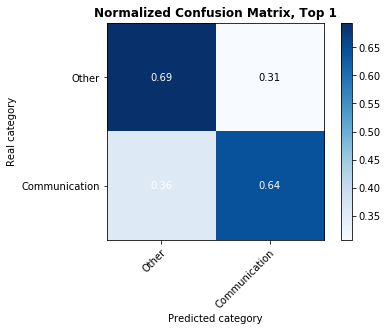

In [8]:
class_names1 = list(set(phone_use_category['category_top_1']))
plot_confusion_matrix(y_test_top1, y_pred_SVMtop1, classes=class_names1, \
                                        title ='Normalized Confusion Matrix, Top 1')

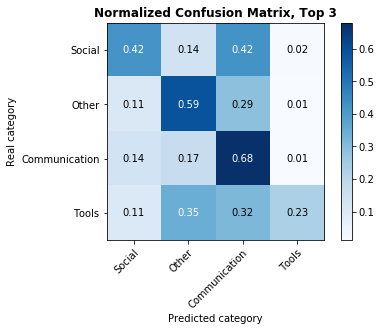

In [9]:
class_names = list(set(phone_use_category['category_top_3']))
plot_confusion_matrix(y_test_top3, y_pred_SVMtop3, classes=class_names, title ='Normalized Confusion Matrix, Top 3')

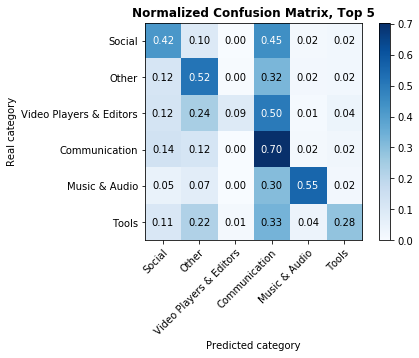

In [10]:
class_names = list(set(phone_use_category['category_top_5']))
plot_confusion_matrix(y_test_top5, y_pred_SVMtop5, classes=class_names, title ='Normalized Confusion Matrix, Top 5')

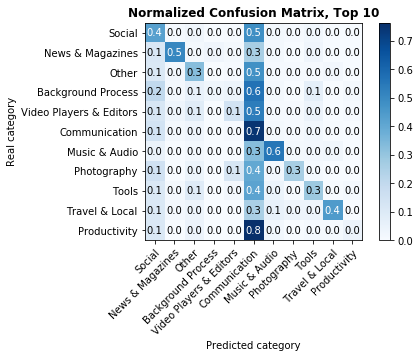

In [11]:
class_names = list(set(phone_use_category['category_top_10']))
plot_confusion_matrix(y_test_top10, y_pred_SVMtop10, classes=class_names, title ='Normalized Confusion Matrix, Top 10', \
                      large=True)